# Tasks notebook for applied_statistics

Task 1: Permutations and Combinations

Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

Would you accept two errors? Explain.

In [1]:
# Import any required functions

# math.comb
import math

import random

import itertools

import numpy as np

import matplotlib.pyplot as plt

from scipy import stats

Define our variables

In [2]:
num_cups_of_tea = 12

num_cups_with_milk_first = 6
num_cups_with_tea_first = 6

Calculate number of ways to choose 6 elements from a list of 12 using math.comb

In [3]:
num_ways = math.comb(num_cups_of_tea, num_cups_with_milk_first)

num_ways

924

In [4]:
# Validation using factorials 
# (https://www.geeksforgeeks.org/factorial-in-python/) and https://docs.python.org/3/library/itertools.html
# n! / r! / (n-r)!

n = math.factorial(12)
r = math.factorial(6)
num_ways2 = n //r // math.factorial(12 - 6)
num_ways2


924

To calcalate the probability of the lady selecting the correct six cups...divide the number of favourable outcomes (i.e. 1) by the total number of possible outcomes (i.e. 924)

In [5]:
1/num_ways

0.0010822510822510823

So, roughly 1 in 1000 chance of selecting the cirrect six cups

Next, to calculate the probability that the lady makes at most one error (i.e. selects five or six correct cups) we can calculate the probabilities for each possible outcome...

In [6]:
# Add a label for each cup
labels = list(range(num_cups_of_tea))

labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Generate a list of the possible combinations...

In [7]:
possible_combinations = list(itertools.combinations(labels, num_cups_with_milk_first))

#len(possible_combinations)
possible_combinations

[(0, 1, 2, 3, 4, 5),
 (0, 1, 2, 3, 4, 6),
 (0, 1, 2, 3, 4, 7),
 (0, 1, 2, 3, 4, 8),
 (0, 1, 2, 3, 4, 9),
 (0, 1, 2, 3, 4, 10),
 (0, 1, 2, 3, 4, 11),
 (0, 1, 2, 3, 5, 6),
 (0, 1, 2, 3, 5, 7),
 (0, 1, 2, 3, 5, 8),
 (0, 1, 2, 3, 5, 9),
 (0, 1, 2, 3, 5, 10),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 6, 7),
 (0, 1, 2, 3, 6, 8),
 (0, 1, 2, 3, 6, 9),
 (0, 1, 2, 3, 6, 10),
 (0, 1, 2, 3, 6, 11),
 (0, 1, 2, 3, 7, 8),
 (0, 1, 2, 3, 7, 9),
 (0, 1, 2, 3, 7, 10),
 (0, 1, 2, 3, 7, 11),
 (0, 1, 2, 3, 8, 9),
 (0, 1, 2, 3, 8, 10),
 (0, 1, 2, 3, 8, 11),
 (0, 1, 2, 3, 9, 10),
 (0, 1, 2, 3, 9, 11),
 (0, 1, 2, 3, 10, 11),
 (0, 1, 2, 4, 5, 6),
 (0, 1, 2, 4, 5, 7),
 (0, 1, 2, 4, 5, 8),
 (0, 1, 2, 4, 5, 9),
 (0, 1, 2, 4, 5, 10),
 (0, 1, 2, 4, 5, 11),
 (0, 1, 2, 4, 6, 7),
 (0, 1, 2, 4, 6, 8),
 (0, 1, 2, 4, 6, 9),
 (0, 1, 2, 4, 6, 10),
 (0, 1, 2, 4, 6, 11),
 (0, 1, 2, 4, 7, 8),
 (0, 1, 2, 4, 7, 9),
 (0, 1, 2, 4, 7, 10),
 (0, 1, 2, 4, 7, 11),
 (0, 1, 2, 4, 8, 9),
 (0, 1, 2, 4, 8, 10),
 (0, 1, 2, 4, 8, 11),
 (0, 1, 2, 4

Generate a random selection of six cups to simulate the lady picking...and convert it into a set

In [8]:
cups_with_milk_sample = random.sample(labels,6)

cups_with_milk_sample.sort()

#set(cups_with_milk_sample)
cups_with_milk_sample


[0, 3, 4, 5, 6, 8]

In [9]:
set(cups_with_milk_sample)

{0, 3, 4, 5, 6, 8}

In [10]:
# Create a list to hold overlaps between the two sets of data
num_overlaps = []

for combination in possible_combinations:
    s1 = set(combination)
    s2 = set(cups_with_milk_sample)
    overlap = s1.intersection(s2)
    print(combination, overlap, len(overlap))
    num_overlaps.append(len(overlap))



(0, 1, 2, 3, 4, 5) {0, 3, 4, 5} 4
(0, 1, 2, 3, 4, 6) {0, 3, 4, 6} 4
(0, 1, 2, 3, 4, 7) {0, 3, 4} 3
(0, 1, 2, 3, 4, 8) {0, 8, 3, 4} 4
(0, 1, 2, 3, 4, 9) {0, 3, 4} 3
(0, 1, 2, 3, 4, 10) {0, 3, 4} 3
(0, 1, 2, 3, 4, 11) {0, 3, 4} 3
(0, 1, 2, 3, 5, 6) {0, 3, 5, 6} 4
(0, 1, 2, 3, 5, 7) {0, 3, 5} 3
(0, 1, 2, 3, 5, 8) {0, 8, 3, 5} 4
(0, 1, 2, 3, 5, 9) {0, 3, 5} 3
(0, 1, 2, 3, 5, 10) {0, 3, 5} 3
(0, 1, 2, 3, 5, 11) {0, 3, 5} 3
(0, 1, 2, 3, 6, 7) {0, 3, 6} 3
(0, 1, 2, 3, 6, 8) {0, 8, 3, 6} 4
(0, 1, 2, 3, 6, 9) {0, 3, 6} 3
(0, 1, 2, 3, 6, 10) {0, 3, 6} 3
(0, 1, 2, 3, 6, 11) {0, 3, 6} 3
(0, 1, 2, 3, 7, 8) {0, 8, 3} 3
(0, 1, 2, 3, 7, 9) {0, 3} 2
(0, 1, 2, 3, 7, 10) {0, 3} 2
(0, 1, 2, 3, 7, 11) {0, 3} 2
(0, 1, 2, 3, 8, 9) {0, 8, 3} 3
(0, 1, 2, 3, 8, 10) {0, 8, 3} 3
(0, 1, 2, 3, 8, 11) {0, 8, 3} 3
(0, 1, 2, 3, 9, 10) {0, 3} 2
(0, 1, 2, 3, 9, 11) {0, 3} 2
(0, 1, 2, 3, 10, 11) {0, 3} 2
(0, 1, 2, 4, 5, 6) {0, 4, 5, 6} 4
(0, 1, 2, 4, 5, 7) {0, 4, 5} 3
(0, 1, 2, 4, 5, 8) {0, 8, 4, 5} 4
(0, 1, 2, 4, 5, 9) 

In [11]:
s1

{6, 7, 8, 9, 10, 11}

In [12]:
s2

{0, 3, 4, 5, 6, 8}

In [13]:
num_overlaps

[4,
 4,
 3,
 4,
 3,
 3,
 3,
 4,
 3,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 4,
 3,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 4,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 5,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 3,
 4,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 4,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 4,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 1,
 2,
 5,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 3,
 4,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 3,
 4,
 3,
 3,
 3,


In [14]:
counts = np.unique(num_overlaps, return_counts=True)

counts

(array([0, 1, 2, 3, 4, 5, 6]), array([  1,  36, 225, 400, 225,  36,   1]))

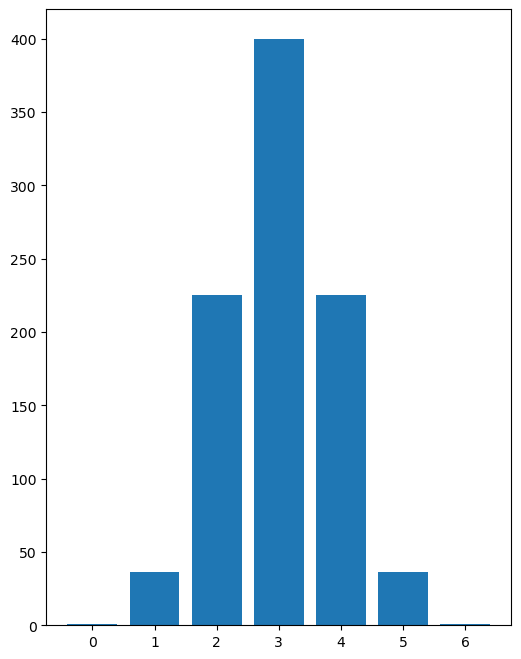

In [15]:
fig, ax = plt.subplots(figsize=(6,8))
ax.bar(counts[0], counts[1]);

Probability of making one mistake (i.e. picking five of six correctly) is 36+1/924

In [16]:
37/924

0.04004329004329004

Probability of making two mistakes (i.e. picking four of six correctly) is 225+36+1/924

In [17]:
(225+36+1)/924

0.28354978354978355

Hmmm, probability of over 28% of getting 4 of the 6 correct - that's too high to acccept

In [18]:
# Note to self - try and pull the elements from the array in the calculations above instead of hardcoding values
# somethink like this...
arr1 = counts[0]
arr2 = counts[1]
mistake2 = (arr2[6] + arr2[5] + arr2[4])/924
mistake2


0.28354978354978355

In [19]:
(arr2[6] + arr2[5] + arr2[4])/924

0.28354978354978355

Task 2: numpy's Normal Distribution

In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

In [20]:
# Define variables and generate sample values

count = 100000
mean = 10.0
stdev = 3.0

sample = np.random.normal(mean, stdev, count)

sample

array([ 7.19955796,  8.45487516,  9.46726366, ..., 11.99058002,
       10.47160077, 12.05903055])

Test for Normality using scipy.stats.shapiro()

(The result should be close to 1 for a normal distribution)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [21]:
res = stats.shapiro(sample)
res
# res.statistic

/Users/pbarry/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9999812841415405, pvalue=0.9418410658836365)

Null hupothesis that the data comes from a normal distribution 

https://docs.scipy.org/doc/scipy-1.12.0/reference/generated/scipy.stats.shapiro.html

pvalue > 0.5 is all good!

No reason to reject the null hypothesis. (fail to reject)


Plot the histogram using an appropriate number of bins

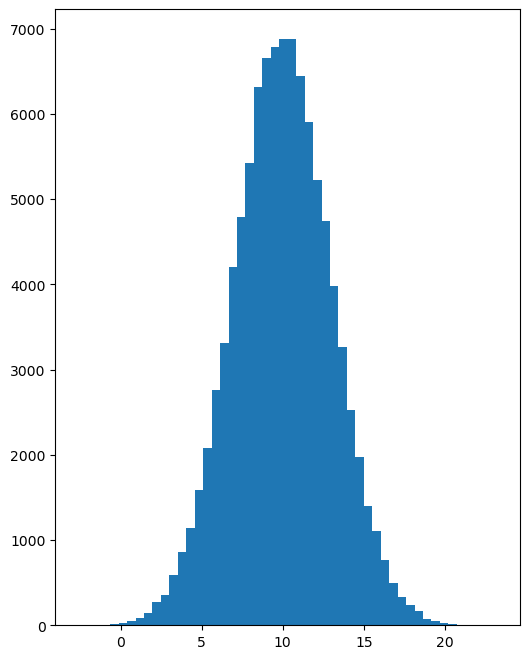

In [22]:
fig, ax = plt.subplots(figsize=(6,8))
bins = 50
plt.hist(sample, bins);

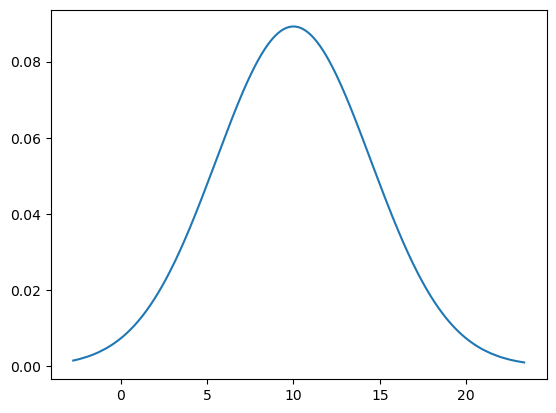

In [23]:
# Sample!!!

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 10
variance = 20
sigma = math.sqrt(variance)
# x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
x = np.sort(sample)
x
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

Task 3: t-Test Calculation

Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

| Patient ID | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
Before	63	68	70	64	74	67	70	57	66	65
After	64	64	68	64	73	70	72	54	61	63
Calculate the t-statistic based on this data set, using Python. Compare it to the value given by scipy.stats. Explain your work and list any sources used.

Task 4: ANOVA

In this test we will estimate the probability of committing a type II error in specific circumstances. To begin, create a variable called no_type_ii and set it to 0.

Now use a loop to perform the following test 10,000 times.

Use numpy.random.normal to generate three samples with 100 values each. Give each a standard deviation of 0.1. Give the first sample a mean of 4.9, the second a mean of 5.0, and the third a mean of 5.1.

Perform one-way anova on the three samples and add 1 to no_type_ii whenever a type II error occurs.

Summarize and explain your results.

Additional References/Sources
https://en.wikipedia.org/wiki/Lady_tasting_tea

Note to self - move these to the readme when done


## End